### 回归问题预测
- Tensorflow2版本中将大量使用keras的简介建模方法


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
features = pd.read_csv('temps.csv')

#看看数据长什么样子
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


数据表中
* year,moth,day,week分别表示的具体的时间
* temp_2：前天的最高温度值
* temp_1：昨天的最高温度值
* average：在历史中，每年这一天的平均最高温度值
* actual：这就是我们的标签值了，当天的真实最高温度
* friend：这一列可能是凑热闹的，你的朋友猜测的可能值，咱们不管它就好了

In [3]:
print('数据维度:', features.shape)

数据维度: (348, 9)


In [4]:
# 处理时间数据
import datetime

# 分别得到年，月，日
years  = features['year']
months = features['month']
days   = features['day']

# datetime格式
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [5]:
dates[:5]

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

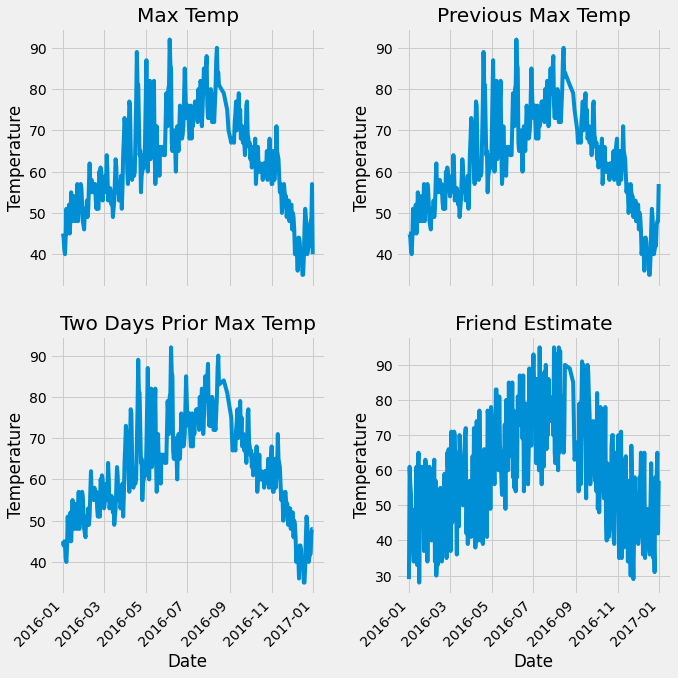

In [6]:
# 准备画图
# 指定默认风格
plt.style.use('fivethirtyeight')

# 设置布局
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.autofmt_xdate(rotation = 45)

# 标签值
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

# 昨天
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

# 前天
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

# 我的逗逼朋友
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

In [7]:
# 独热编码
features = pd.get_dummies(features)
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [8]:
# 标签
labels = np.array(features['actual'])

# 在特征中去掉标签
features= features.drop('actual', axis = 1)

# 名字单独保存一下，以备后患
feature_list = list(features.columns)

# 转换成合适的格式
features = np.array(features)

In [9]:
features.shape

(348, 14)

In [10]:
from sklearn import preprocessing
input_features = preprocessing.StandardScaler().fit_transform(features)

In [11]:
input_features[0]

array([ 0.        , -1.5678393 , -1.65682171, -1.48452388, -1.49443549,
       -1.3470703 , -1.98891668,  2.44131112, -0.40482045, -0.40961596,
       -0.40482045, -0.40482045, -0.41913682, -0.40482045])

### 基于Keras构建网络模型
一些常用参数已经列出，如下所示：

- activation：激活函数的选择，一般常用relu
- kernel_initializer,bias_initializer：权重与偏置参数的初始化方法，有时候不收敛换种初始化就突然好使了。。。玄学
- kernel_regularizer，bias_regularizer：要不要加入正则化，
- inputs：输入，可以自己指定，也可以让网络自动选
- units：神经元个数

按顺序构造网络模型

In [12]:
model = tf.keras.Sequential()
model.add(layers.Dense(16))
model.add(layers.Dense(32))
model.add(layers.Dense(1))

compile相当于对网络进行配置，指定好优化器和损失函数等

In [13]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001),
             loss='mean_squared_error')

In [14]:
model.fit(input_features, labels, validation_split=0.25, epochs=10, batch_size=64)

Epoch 1/10
5/5 [==============================] - 3s 405ms/step - loss: 4278.0719 - val_loss: 3547.5295
Epoch 2/10
5/5 [==============================] - 0s 24ms/step - loss: 2083.2126 - val_loss: 5484.0664
Epoch 3/10
5/5 [==============================] - 0s 18ms/step - loss: 148.0028 - val_loss: 3433.3040
Epoch 4/10
5/5 [==============================] - 0s 22ms/step - loss: 144.0062 - val_loss: 2639.9741
Epoch 5/10
5/5 [==============================] - 0s 17ms/step - loss: 101.2261 - val_loss: 2240.7629
Epoch 6/10
5/5 [==============================] - 0s 16ms/step - loss: 120.5763 - val_loss: 1371.3844
Epoch 7/10
5/5 [==============================] - 0s 27ms/step - loss: 243.5977 - val_loss: 1200.9189
Epoch 8/10
5/5 [==============================] - 0s 20ms/step - loss: 110.8272 - val_loss: 1104.2802
Epoch 9/10
5/5 [==============================] - 0s 19ms/step - loss: 108.3759 - val_loss: 1000.1851
Epoch 10/10
5/5 [==============================] - 0s 24ms/step - loss: 44.5939

In [15]:
input_features.shape

(348, 14)

似乎存在一些问题，模型还没有完全收敛，能不能调些参数呢

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 817
Trainable params: 817
Non-trainable params: 0
_________________________________________________________________


### 更改初始化方法后

In [17]:
model = tf.keras.Sequential()
model.add(layers.Dense(16,kernel_initializer='random_normal'))
model.add(layers.Dense(32,kernel_initializer='random_normal'))
model.add(layers.Dense(1,kernel_initializer='random_normal'))

In [18]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001),
             loss='mean_squared_error')
model.fit(input_features, labels, validation_split=0.25, epochs=100, batch_size=64)

Epoch 1/100
5/5 [==============================] - 1s 102ms/step - loss: 4372.2078 - val_loss: 2866.7014
Epoch 2/100
5/5 [==============================] - 0s 21ms/step - loss: 4341.0126 - val_loss: 2774.2583
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 4136.8449 - val_loss: 2630.9827
Epoch 4/100
5/5 [==============================] - 0s 37ms/step - loss: 3881.2495 - val_loss: 2495.7463
Epoch 5/100
5/5 [==============================] - 0s 23ms/step - loss: 1798.8766 - val_loss: 1915.8064
Epoch 6/100
5/5 [==============================] - 0s 21ms/step - loss: 88.0016 - val_loss: 1512.8838
Epoch 7/100
5/5 [==============================] - 0s 14ms/step - loss: 66.7116 - val_loss: 1073.3275
Epoch 8/100
5/5 [==============================] - 0s 21ms/step - loss: 74.8762 - val_loss: 805.2020
Epoch 9/100
5/5 [==============================] - 0s 18ms/step - loss: 60.0445 - val_loss: 615.8760
Epoch 10/100
5/5 [==============================] - 0s 17ms/step - loss: 

### 加入正则化惩罚项

In [19]:
model = tf.keras.Sequential()
model.add(layers.Dense(16,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(layers.Dense(32,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(layers.Dense(1,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.03)))

model.compile(optimizer=tf.keras.optimizers.SGD(0.001),
             loss='mean_squared_error')
model.fit(input_features, labels, validation_split=0.25, epochs=100, batch_size=64)

Epoch 1/100
5/5 [==============================] - 1s 62ms/step - loss: 4412.0566 - val_loss: 2869.5552
Epoch 2/100
5/5 [==============================] - 0s 20ms/step - loss: 4316.1982 - val_loss: 2785.7463
Epoch 3/100
5/5 [==============================] - 0s 18ms/step - loss: 4147.1193 - val_loss: 2664.8555
Epoch 4/100
5/5 [==============================] - 0s 21ms/step - loss: 3853.4878 - val_loss: 2512.4958
Epoch 5/100
5/5 [==============================] - 0s 24ms/step - loss: 1685.3482 - val_loss: 2255.4373
Epoch 6/100
5/5 [==============================] - 0s 28ms/step - loss: 159.6936 - val_loss: 1356.8010
Epoch 7/100
5/5 [==============================] - 0s 33ms/step - loss: 55.7996 - val_loss: 1029.2374
Epoch 8/100
5/5 [==============================] - 0s 33ms/step - loss: 37.7754 - val_loss: 735.3165
Epoch 9/100
5/5 [==============================] - 0s 32ms/step - loss: 64.4726 - val_loss: 624.6925
Epoch 10/100
5/5 [==============================] - 0s 18ms/step - loss: 

### 预测模型结果

In [20]:
predict = model.predict(input_features)

In [21]:
predict.shape

(348, 1)

### 测试结果并进行展示

In [22]:
# 转换日期格式
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# 创建一个表格来存日期和其对应的标签数值
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# 同理，再创建一个来存日期和其对应的模型预测值
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predict.reshape(-1)}) 

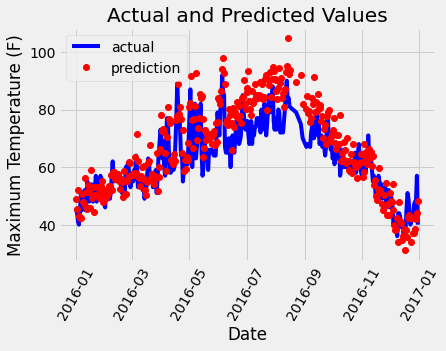

In [24]:
# 真实值
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# 预测值
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# 图名
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');
